In [105]:
import pandas as pd
import numpy as np
from google.colab import files

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [64]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## **Exploratory Data Analysis**

### Data Cleaning

*Data type of Total Charges is Object. It should be changed to Float*

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [66]:
data.shape

(7043, 21)

*Due to TotalCharges datatype of object*

In [67]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


*First, replace empty strings with Nan then change data type*

In [68]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
data['TotalCharges'] = data['TotalCharges'].astype(float)

*Count of TotalCharges is 7032. 11 null values*

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [70]:
data['TotalCharges'].isna().sum()

11

*Rows with TotalCharges null have tenure 0 as well. Hence drop these rows*

In [71]:
data[data['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [72]:
data.dropna(subset = 'TotalCharges', inplace = True)

In [73]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [74]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

***Duplicate values check***

In [75]:
data.duplicated().sum()

0

*CustomerID unique to each customer Check*

In [76]:
data[['customerID']].nunique()

customerID    7032
dtype: int64

*Non-null invalid value check*

In [77]:
data_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for column in data_columns:
  unique_values = data[column].unique()
  print(f"{column} column: {unique_values}", end = '\n')


PhoneService column: ['No' 'Yes']
MultipleLines column: ['No phone service' 'No' 'Yes']
InternetService column: ['DSL' 'Fiber optic' 'No']
OnlineSecurity column: ['No' 'Yes' 'No internet service']
OnlineBackup column: ['Yes' 'No' 'No internet service']
DeviceProtection column: ['No' 'Yes' 'No internet service']
TechSupport column: ['No' 'Yes' 'No internet service']
StreamingTV column: ['No' 'Yes' 'No internet service']
StreamingMovies column: ['No' 'Yes' 'No internet service']
Contract column: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling column: ['Yes' 'No']
PaymentMethod column: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn column: ['No' 'Yes']


*Replace 'No phone service' and 'No internet service' to 'No'*

In [78]:
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')

data_columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies']

for column in data_columns:
  data[column] = data[column].replace('No internet service', 'No')



In [79]:
data_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for column in data_columns:
  unique_values = data[column].unique()
  print(f"{column} column: {unique_values}", end = '\n')

PhoneService column: ['No' 'Yes']
MultipleLines column: ['No' 'Yes']
InternetService column: ['DSL' 'Fiber optic' 'No']
OnlineSecurity column: ['No' 'Yes']
OnlineBackup column: ['Yes' 'No']
DeviceProtection column: ['No' 'Yes']
TechSupport column: ['No' 'Yes']
StreamingTV column: ['No' 'Yes']
StreamingMovies column: ['No' 'Yes']
Contract column: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling column: ['Yes' 'No']
PaymentMethod column: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn column: ['No' 'Yes']


*Download the cleaned and preprocessed data for analysis in* **Power BI**

In [59]:
data.to_csv('Telco-Customer-Churn.csv', index=False)
files.download('Telco-Customer-Churn.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## **Data Analysis**

### ***Overall Analysis***

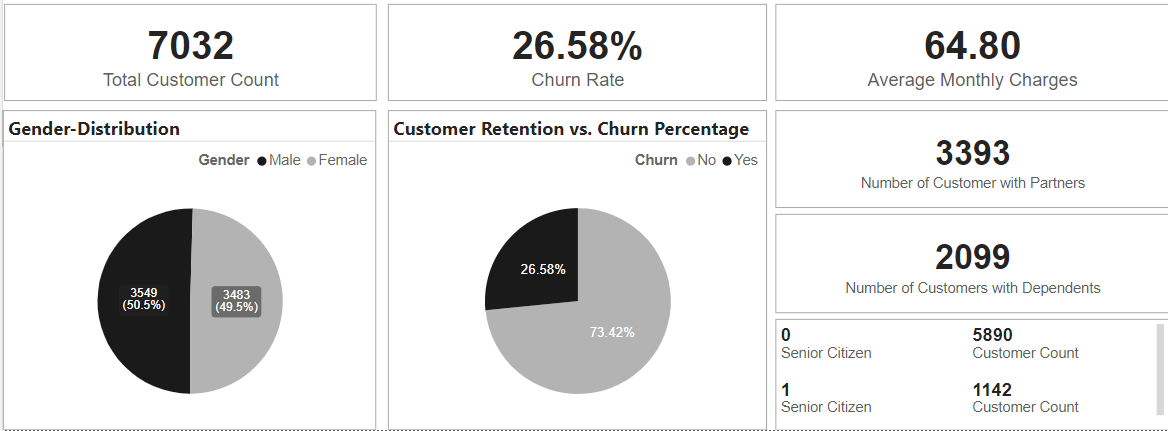

From the above , it is evident that


1. Our customer base comprises 7032 individuals, with an almost equal distribution between male and female customers.
2. About **83%** of customers are **under 65 years old**.
            
   This implies **strong presence of young people in our customer demographics**.

4. About 48% customers have partners while 30% have dependents.
5. The average monthly charge of our product is $64.80
6. About **26.58% of customers churned**

    Implying that they have stopped using or purchasing our product or service



### **Demographic Impact on Customer Churn**

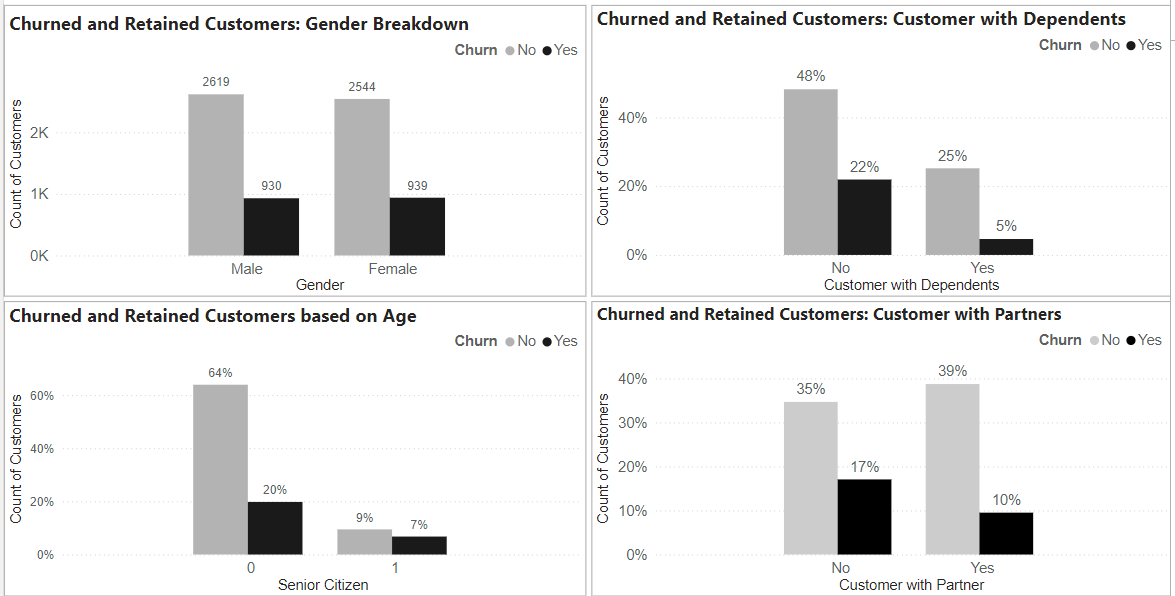

From the above, it is evident:

1. Gender-distribution does not have siginificant impact on churn.

2. Customers without dependents are more likely to churn (**22%**) compared to those with dependents(**5%**).

3. The young customers have higher churning percentage of **20%** compared to older customers with **7%**.
    
    Implying the younger customers are more tech-savy and open to switching services if not satisfied.

4. Customers without partners have a higher churn rate of **17%**, which may be influenced by factors such as different lifestyle needs or preferences compared to those with partners.

    This group may have unique requirements that are not met by current offerings, leading to a higher likelihood of churn.

### **Tenure and Contract Type Impact**

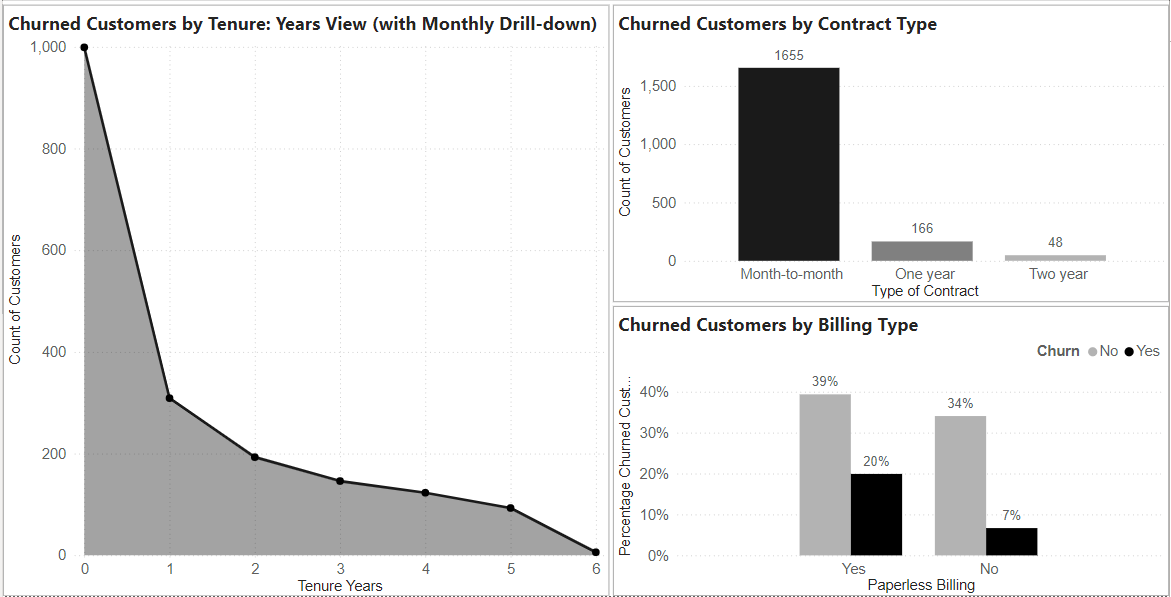

Tenure Years drilled down to Months for 0-year mark

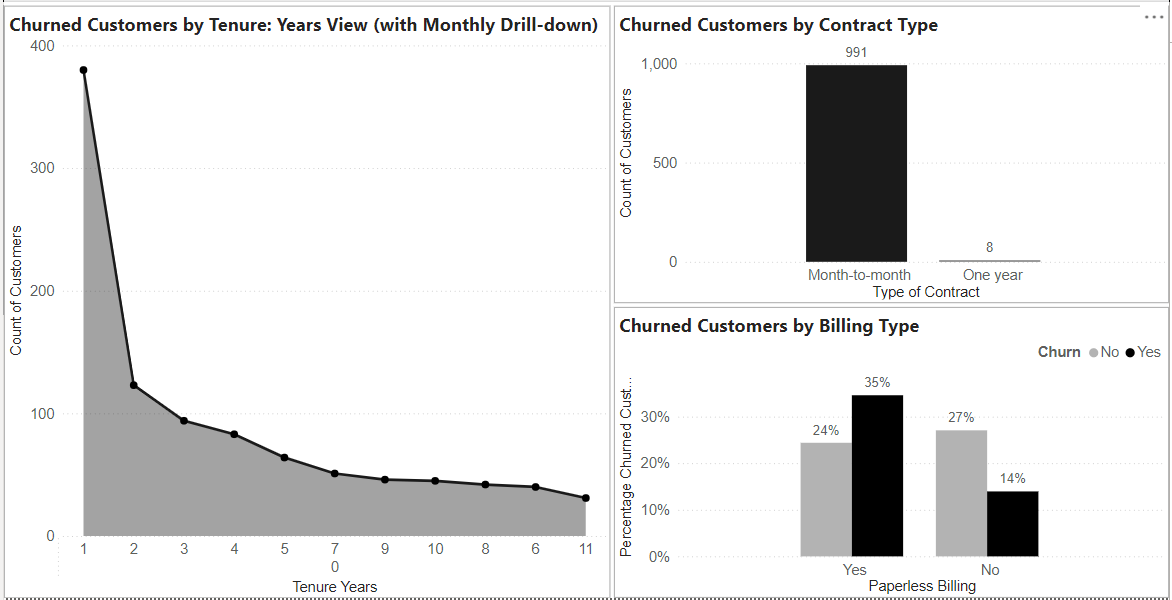

From the above, it is evident:

1. About **1000 customers** left in **less than a year** of signing up

  Indicating potential dissatisfaction and poor customer experience with the service or product shortly after signing up

2. **More than 300 Customers** left **within the first month** in which **99%** opted for monthly contract

  Implying that customers did not find it suitable for their needs shortly after subscribing. Hence, left it.

3. **88%** of customers using **month-to-month** contract churned.

  Monthly contracts provide flexibility to customers but also make it easier to switch if they are unsatisfied

4. Customers who paid bills through paperless method are more likely to churn (**35%**) than others (**14%**)

  To improve customer retention, the onboarding and initial experience should be improved to address early customer concerns, especially for those on monthly contracts. Additionally, efficient communication strategies should be employed to meet the needs and concerns of customers



### **Financial and Payment Impact**

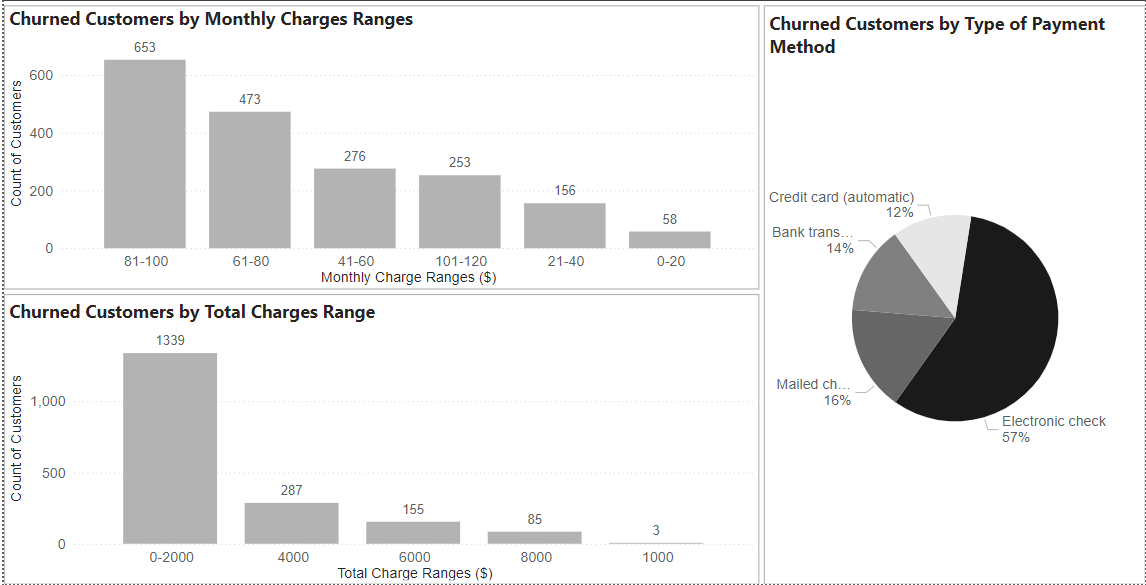

From the above, it is evident:

1. Customers with higher monthly charges of **more than $60** are more likely to churn

  Indicates the higher monthly charges is potentially a reason for customers to leave in the monthly contract. Introducing student plans and discount offers can reduce the increasing churn ratio

2. Customers with payment method of Electronic Check are more likely to churn

### ***Service Usage***

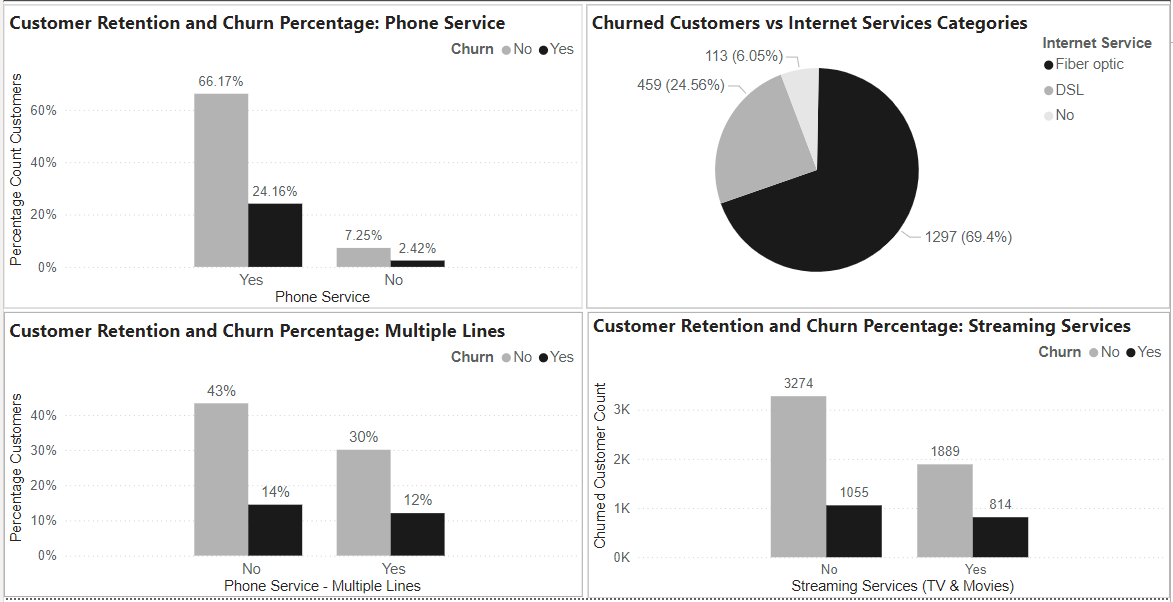

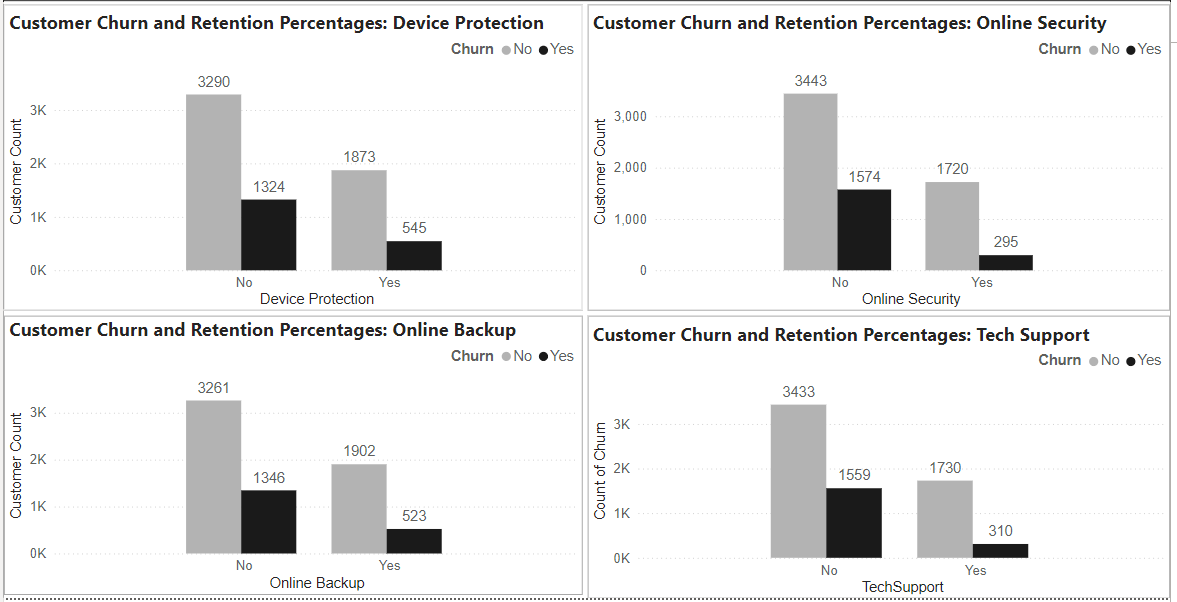

From the above, it is evident:

1. **Fiber Optic** internet service is the most common in churned customers

    Implying that even though fiber optic is the most popular in customers but it is probably not meeting the customer expectations or needs

2. About **24%** of customers who opted for phone service left

    The phone service alone is not the driving factor to increase customer retention

3. The other services such as multiple phone lines, streaming services, device protection, online security, online backup, and tech support are a potential reason for **customer retention** as the customers with these services are less likely to churn compared to others who did not opt for them.

    Implying that effective marketing strategies for these services, offering bundle services can prove beneficial in decreasing customer churn rate

## **Data Normalization**

*Binary Encoding*

In [81]:
data_b_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity','OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for column in data_b_columns:
  data[column] = data[column].map({"Yes": 1, "No":0})


data['gender'] = data['gender'].map({"Male": 1, "Female":0})
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


*One hot Encoding for Nominal Columns*

In [82]:
data_n_columns = ['InternetService', 'Contract', 'PaymentMethod']

one_hot_encoder = OneHotEncoder(sparse=False, drop = 'first')

encoded = one_hot_encoder.fit_transform(data[data_n_columns])

encoded_columns = one_hot_encoder.get_feature_names_out(data_n_columns)
encoded_df = pd.DataFrame(encoded, columns=encoded_columns, index=data.index)

data = pd.concat([data.drop(data_n_columns, axis=1), encoded_df], axis=1)

data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,29.85,29.85,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,56.95,1889.50,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,53.85,108.15,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,42.30,1840.75,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,70.70,151.65,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,0,...,84.80,1990.50,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,2234-XADUH,0,0,1,1,72,1,1,0,1,...,103.20,7362.90,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,4801-JZAZL,0,0,1,1,11,0,0,1,0,...,29.60,346.45,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,8361-LTMKD,1,1,1,0,4,1,1,0,0,...,74.40,306.60,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## ***Random Forest Model***

*Split the data to features and label (X and Y)*

In [83]:
X = data.drop(columns = ['customerID','Churn'])
Y = data['Churn']


*Split the data to 80-20 ratio that is 80% training dataset and 20% testing dataset*

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [88]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,0,0,0,0,43,0,0,0,0,1,...,1,49.05,2076.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3410,1,0,0,0,3,1,0,0,0,0,...,0,53.40,188.70,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5483,0,0,1,0,55,1,1,0,0,1,...,1,77.75,4458.15,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5524,1,0,1,1,45,1,0,1,0,0,...,0,54.65,2553.70,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6337,0,0,1,1,55,1,1,1,0,0,...,0,100.90,5448.60,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,1,0,0,0,3,1,1,0,0,0,...,0,50.40,137.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5199,0,0,0,0,51,1,1,0,1,1,...,1,111.50,5703.25,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5235,1,0,0,0,9,1,1,1,0,0,...,1,81.15,784.45,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5399,0,0,0,0,50,1,0,0,0,0,...,0,19.75,989.05,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [89]:
Y_train

6030    1
3410    1
5483    1
5524    0
6337    0
       ..
3778    0
5199    0
5235    0
5399    0
862     1
Name: Churn, Length: 5625, dtype: int64

In [101]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [102]:
Y_pred = random_forest.predict(X_test)

In [106]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)

print("Accuracy of Model = ", accuracy*100, "%")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC Score:", roc_auc)

Accuracy of Model =  79.53091684434968 %
Precision: 0.6546762589928058
Recall: 0.48663101604278075
F1-score: 0.558282208588957
ROC-AUC Score: 0.696848905891671


*There is room for improvement. Tuning hyperparameters using advanced techniques and gathering more data can help to improve the metrics of this model.*